## Alferian Forest Fires 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\Machine Learning\Udemy\Practice\Algerian_forest_fires_dataset_UPDATE.csv", header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [4]:
df = dataset.copy()
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122 index, So we can make new colums based on the region..

In [6]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df = df.drop(122).reset_index(drop=True)

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
# Fix spaces is column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
# Change the req columns as int datatypes
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [18]:
# Change the req columns a float datatypes
obj_dtypes = [features for features in df.columns if df[features].dtypes == 'O' ]
obj_dtypes

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [19]:
for feature in obj_dtypes:
    if feature!="Classes":
        df[feature] = df[feature].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


Lets save our cleaned dataset

In [21]:
df.to_csv("Algerian_forest_fires_dataset_CLEANED.csv",index=False)

# Exploratory Data Analysis

In [22]:
df_copy = df.drop(columns=['day','month','year'], axis=1)

In [23]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [25]:
df_copy['Classes'] = df_copy['Classes'].str.strip()
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [26]:
df_copy['Classes'] = df_copy['Classes'].map({'not fire': 0, 'fire': 1})

In [27]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


or we can directly use..... df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

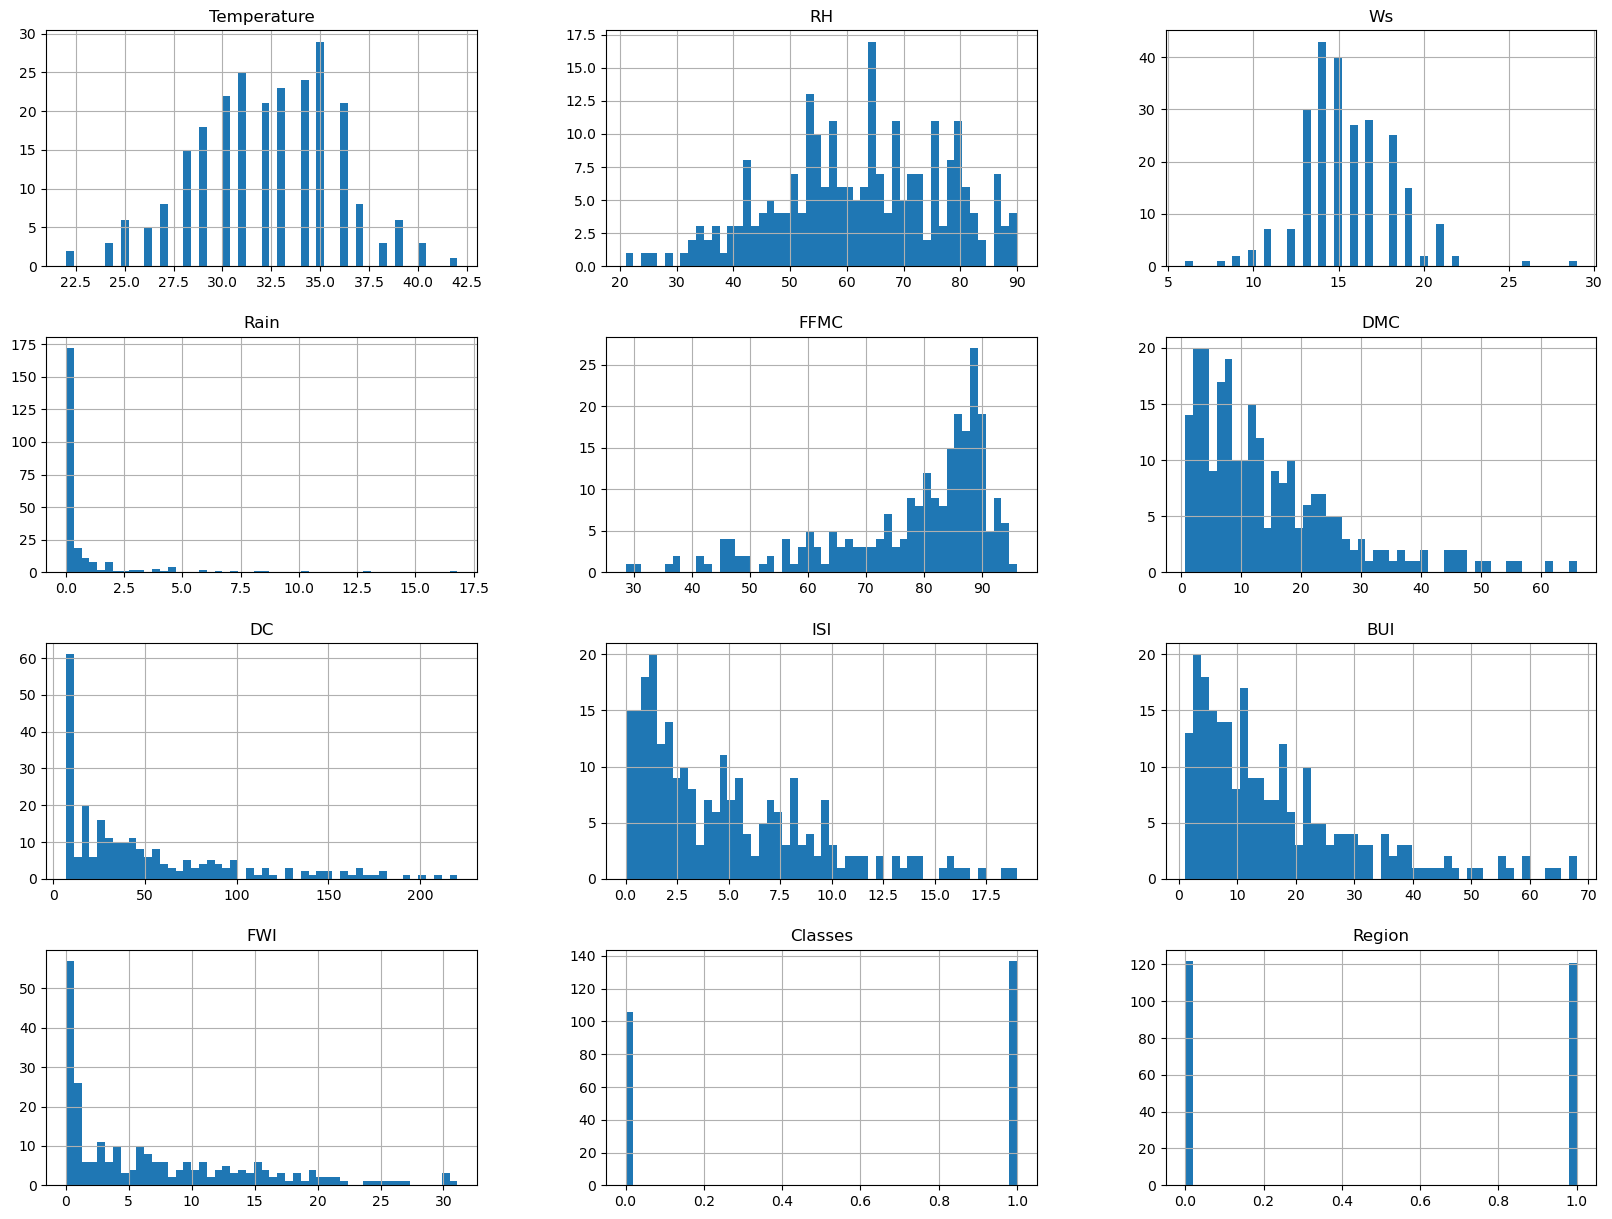

In [29]:
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [30]:
# Percentage of pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

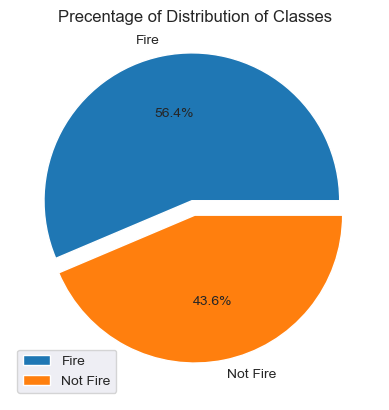

In [74]:
Class_labels = ['Fire','Not Fire']
plt.pie(percentage,labels=Class_labels, autopct='%1.1f%%', explode=[0.1,0])
plt.title("Precentage of Distribution of Classes")
plt.legend()

In [32]:
# Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


Text(0.5, 1.0, 'Correlation Matrix')

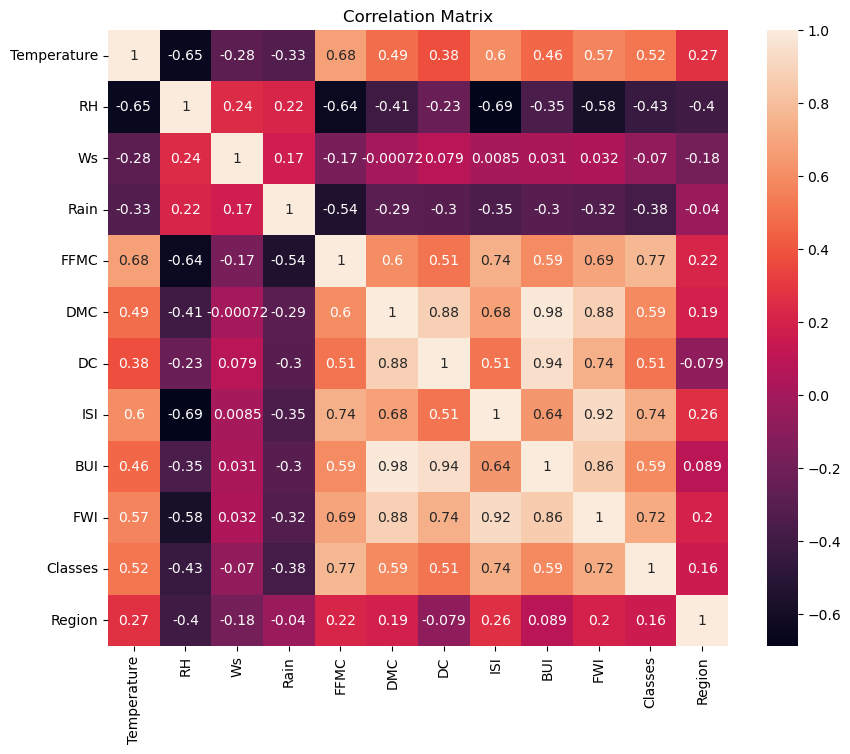

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), annot=True)
plt.title("Correlation Matrix")

<Axes: ylabel='FWI'>

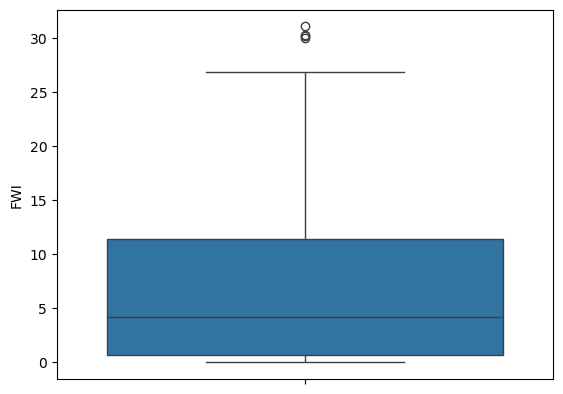

In [34]:
# Box Plot for our dependent variable

sns.boxplot(df['FWI'])

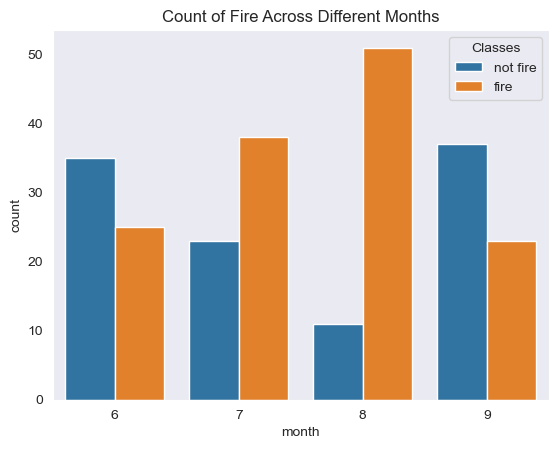

In [35]:
# Monthly fire analysis
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

sns.set_style('dark')
sns.countplot(x='month', hue='Classes', data=df )
plt.title("Count of Fire Across Different Months")
plt.show()
# Conclusion : Max no. of fire occured in 8th month..
# if yoy want for specific region then select data acc to it df.loc[df['Region]==1]

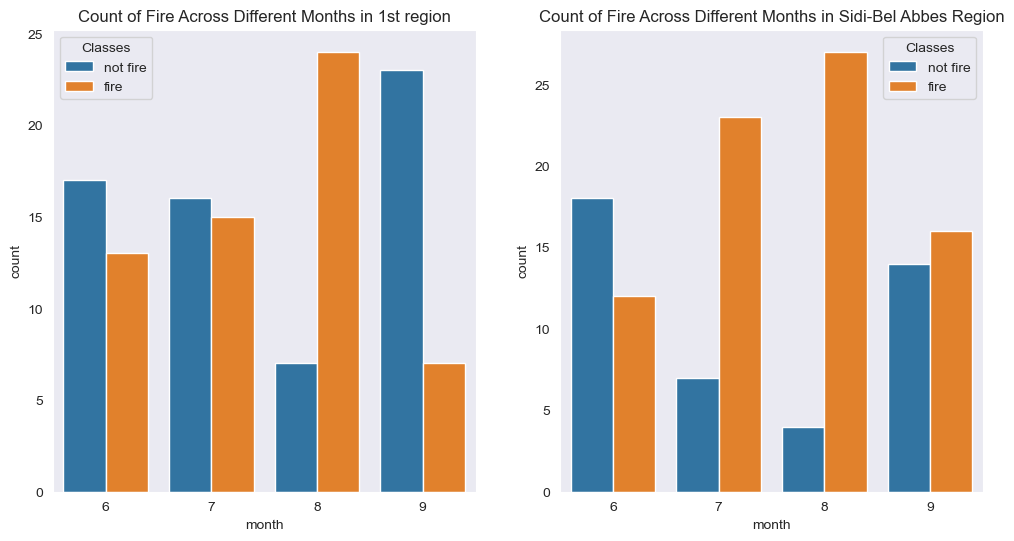

In [36]:
sns.set_style('dark')
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
df_Region_0 = df.loc[df['Region']==0]
sns.countplot(x='month', hue='Classes', data=df_Region_0 )
plt.title("Count of Fire Across Different Months in 1st region")


plt.subplot(1,2,2)
df_Region_1 = df.loc[df['Region']==1]
sns.countplot(x='month', hue='Classes', data=df_Region_1 )
plt.title("Count of Fire Across Different Months in Sidi-Bel Abbes Region")

plt.show()


# Feature Selection

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_copy.drop(columns=['FWI'], axis=1)
y = df_copy['FWI']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [40]:
# Feature selection based on coorelation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [41]:
# Check for multicolerinearity
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
# threshold --- by domain expert
corr_features = correlation(X_train, 0.85)

In [43]:
# Droping features which are highly correleated

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Feature Scaling or Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

In [48]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

lin_reg_dict = {"MSE" : mse, "MAE": mae, "R2_score": r2}

MSE :  0.6742766873791581
MAE :  0.5468236465249976
R2_score :  0.9847657384266951


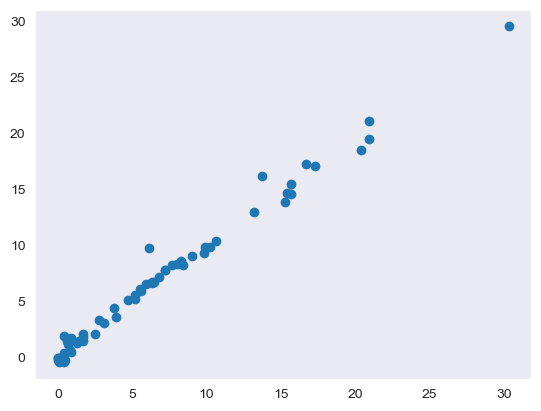

In [49]:
plt.scatter(y_test, y_pred)

# Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)


In [56]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

lasso_reg_dict = {"MSE" : mse, "MAE": mae, "R2_score": r2}

MSE :  5.517251101025224
MAE :  1.8822353634896
R2_score :  0.8753460589519703


Cross Validation Lasso

In [61]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5)

In [62]:
lassocv.alpha_

0.05725391318234408

In [73]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [64]:
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

MSE :  0.7924995554743622
MAE :  0.6199701158263431
R2_score :  0.9820946715928275


# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge()
Ridge_reg.fit(X_train,y_train)
y_pred = Ridge_reg.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

Ridge_reg_dict = {"MSE" : mse, "MAE": mae, "R2_score": r2}

MSE :  0.6949198918152067
MAE :  0.5642305340105693
R2_score :  0.9842993364555513


Cross Validation Ridge

In [68]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)

RidgeCV(cv=5)

In [70]:
ridgecv.alpha_

1.0

In [69]:
y_pred = ridgecv.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

MSE :  0.6949198918152067
MAE :  0.5642305340105693
R2_score :  0.9842993364555513


# Elastic Net Regression

In [58]:
from sklearn.linear_model import ElasticNet

ElasticNet_reg = ElasticNet()
ElasticNet_reg.fit(X_train,y_train)
y_pred = ElasticNet_reg.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)

print("MSE : ",mse)
print("MAE : ",mae)
print("R2_score : ",r2)

Elasticnet_reg_dict = {"MSE" : mse, "MAE": mae, "R2_score": r2}

MSE :  5.517251101025224
MAE :  1.8822353634896
R2_score :  0.8753460589519703


In [59]:
result = {
    "linear" : lin_reg_dict,
    "Lasso"  : lasso_reg_dict,
    "Ridge"  : Ridge_reg_dict,
    "ElasticNet" : Elasticnet_reg_dict
}

In [60]:
result = pd.DataFrame(result)
result

,linear,Lasso,Ridge,ElasticNet
MSE,0.674277,5.517251,0.694920,5.517251
MAE,0.546824,1.882235,0.564231,1.882235
R2_score,0.984766,0.875346,0.984299,0.875346
